## Import Machine Learning Packages

In [1]:
# Importing the required packages 
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import matplotlib.pyplot as plt


## Read Data

In [2]:
accidentData=pd.read_csv("../Data/trainingdata.csv")
accidentData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3057 entries, 0 to 3056
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Unnamed: 0           3057 non-null   int64
 1   Number of Vehicles   3057 non-null   int64
 2   1st Road Class       3057 non-null   int64
 3   Road Surface         3057 non-null   int64
 4   Lighting Conditions  3057 non-null   int64
 5   Weather Conditions   3057 non-null   int64
 6   Casualty Class       3057 non-null   int64
 7   Casualty Severity    3057 non-null   int64
 8   Sex of Casualty      3057 non-null   int64
 9   Age of Casualty      3057 non-null   int64
 10  Type of Vehicle      3057 non-null   int64
dtypes: int64(11)
memory usage: 262.8 KB


## Separate Features and Target Attributes

In [3]:
#feature and target split
feat    = ['Number of Vehicles','1st Road Class','Road Surface','Lighting Conditions','Weather Conditions','Casualty Class','Sex of Casualty','Age of Casualty','Type of Vehicle']
features = accidentData[feat]
target   = accidentData['Casualty Severity']

## Split Training Data and Testing Data

In [4]:
#Split training data(70%) and testing data (30%)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=1)

## Decision Tree Learning

Confusion Matrix [[753  76]
 [ 67  22]]
Accuracy of the model is 0.8442265795206971
precision of the model is 0.22448979591836735
Recall of the model is 0.24719101123595505
ROC Curve


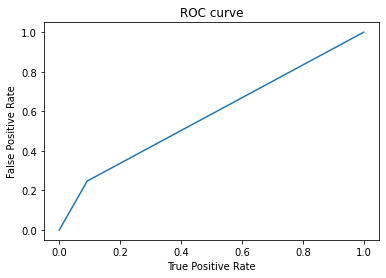

In [5]:
from sklearn.tree import DecisionTreeClassifier 

#Building decision tree model
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

#Perormance evaluation of Decision tree
print("Confusion Matrix", metrics.confusion_matrix(y_test, y_pred))
print("Accuracy of the model is", metrics.accuracy_score(y_test, y_pred))
print("precision of the model is", metrics.precision_score(y_test, y_pred))
print("Recall of the model is", metrics.recall_score(y_test, y_pred))
print("ROC Curve")
tpr, fpr, thres=metrics.roc_curve(y_test, y_pred)

plt.plot(tpr, fpr)
plt.title("ROC curve")
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.show()

# Random Forest

Confusion Matrix [[790  39]
 [ 72  17]]
Accuracy of the model is 0.8790849673202614
precision of the model is 0.30357142857142855
Recall of the model is 0.19101123595505617
ROC Curve


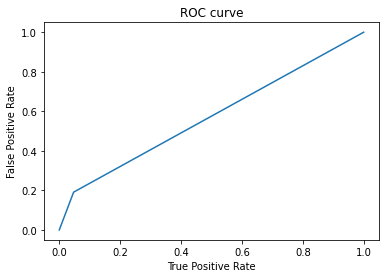

In [6]:
from sklearn.ensemble import RandomForestClassifier

#Building random forest tree model
rf = RandomForestClassifier(n_estimators = 100)
rf = rf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = rf.predict(X_test)

#Perormance evaluation of Random forest
print("Confusion Matrix", metrics.confusion_matrix(y_test, y_pred))
print("Accuracy of the model is", metrics.accuracy_score(y_test, y_pred))
print("precision of the model is", metrics.precision_score(y_test, y_pred))
print("Recall of the model is", metrics.recall_score(y_test, y_pred))
print("ROC Curve")
tpr, fpr, thres=metrics.roc_curve(y_test, y_pred)

plt.plot(tpr, fpr)
plt.title("ROC curve")
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.show()

## K- Nearest Neighbour Learning

K-NEAREST NEIGHBOUR LEARNING
Confusion Matrix [[823   6]
 [ 88   1]]
Accuracy of the model is 0.8976034858387799
precision of the model is 0.14285714285714285
Recall of the model is 0.011235955056179775
ROC Curve


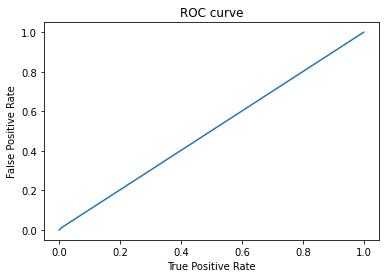

In [7]:
print("K-NEAREST NEIGHBOUR LEARNING")
from sklearn.neighbors import KNeighborsClassifier 

knn = KNeighborsClassifier(n_neighbors=7) 
knn.fit(X_train, y_train)
y_pred_knn=knn.predict(X_test)

print("Confusion Matrix", metrics.confusion_matrix(y_test, y_pred_knn))
print("Accuracy of the model is", metrics.accuracy_score(y_test, y_pred_knn))
print("precision of the model is", metrics.precision_score(y_test, y_pred_knn))
print("Recall of the model is", metrics.recall_score(y_test, y_pred_knn))
print("ROC Curve")
tpr, fpr, thres=metrics.roc_curve(y_test, y_pred_knn)

plt.plot(tpr, fpr)
plt.title("ROC curve")
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.show()

## Gradient Boosting Classifier

Gradient Boosting Classifier
Confusion Matrix [[819  10]
 [ 83   6]]
Accuracy of the model is 0.8986928104575164
precision of the model is 0.375
Recall of the model is 0.06741573033707865
ROC Curve


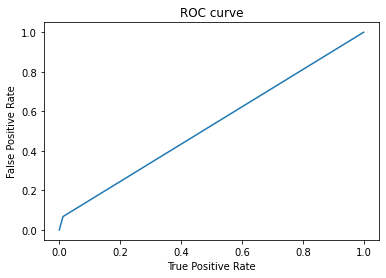

In [8]:
from sklearn.ensemble import GradientBoostingClassifier
print("Gradient Boosting Classifier")

gb = GradientBoostingClassifier(learning_rate=0.1)
gb.fit(X_train, y_train)
y_pred_gb=gb.predict(X_test)

print("Confusion Matrix", metrics.confusion_matrix(y_test, y_pred_gb))
print("Accuracy of the model is", metrics.accuracy_score(y_test, y_pred_gb))
print("precision of the model is", metrics.precision_score(y_test, y_pred_gb))
print("Recall of the model is", metrics.recall_score(y_test, y_pred_gb))
print("ROC Curve")
tpr, fpr, thres=metrics.roc_curve(y_test, y_pred_gb)

plt.plot(tpr, fpr)
plt.title("ROC curve")
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.show()

## Save the Model

In [9]:
import pickle

#dump on picle
pickle.dump(gb, open('accidentSeverityPredictor.pkl','wb'))